In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import symbols, cos, sin
from sympy.plotting import plot_parametric
from math import sin,cos
import io
import cv2
import pykalman
from scipy import optimize
import matplotlib as mpl
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.io import wavfile

# Лабораторная работа 2.5 
В файле ’tune.wav’ записана мелодия, искаженная помехой. Выполнена фильтрация.

In [2]:
Fs, data = wavfile.read('./tune.wav')
print(Fs)
print(data)

44100
[     0  27652 -29673 ...  23172  14248 -30478]


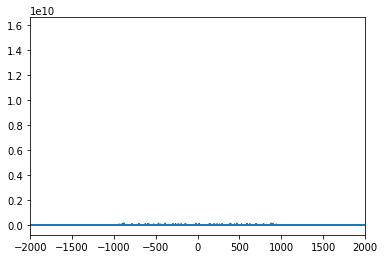

In [3]:
ft = np.fft.fft(data)
freqs = np.fft.fftfreq(len(ft), d=1/Fs)
plt.figure(1)
plt.xlim(-2000, 2000)
plt.plot(freqs, abs(ft))

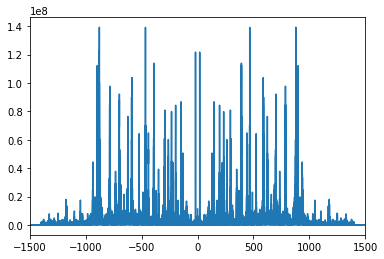

In [14]:
# сцепиально подобранная константа
fltr = 1400
fltr_ft = []
for i in range(len(ft)):
    if abs(freqs[i]) > fltr:
        fltr_ft.append(0)
    else:
        fltr_ft.append(ft[i])
plt.figure(1)
plt.xlim(-1500, 1500)
plt.plot(freqs, np.array(np.abs(fltr_ft)))

In [15]:
data2 = np.fft.ifft(fltr_ft)
data_ans = []
for i in data2:
    data_ans.append(np.int16(i.real))
wavfile.write('./tune_filt.wav', Fs, np.int16(data_ans))